# Mushroom Classification
## Soham Shah - J059

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [7]:
warnings.filterwarnings('ignore')

### Importing the data

In [8]:
train= pd.read_csv('train.csv')
test_final= pd.read_csv('test.csv')
train.head()

,id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,6196,1,x,f,p,f,c,f,w,n,...,s,w,w,p,w,o,p,k,v,d
1,5516,1,f,y,n,f,m,a,c,b,...,y,c,c,p,w,n,n,w,c,d
2,4132,1,k,y,e,f,s,f,c,n,...,k,p,w,p,w,o,e,w,v,l
3,2327,0,x,f,g,f,n,f,w,b,...,k,w,w,p,w,t,p,w,n,g
4,7825,1,f,s,g,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,g


In [9]:
#checking for any missing values
train.isnull().sum()

id                          0
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Exploratory Data Analysis

**Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train_enc= copy.deepcopy(train)
for col in train_enc.columns:
    train_enc[col]=labelencoder.fit_transform(train_enc[col])
    
train_enc.head()

,id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,4948,1,5,0,5,0,1,1,1,1,...,2,7,7,0,2,1,4,2,4,0
1,4391,1,2,3,4,0,4,0,0,0,...,3,1,1,0,2,0,3,7,1,0
2,3295,1,3,3,2,0,7,1,0,1,...,1,6,7,0,2,1,0,7,4,2
3,1834,0,5,0,3,0,5,1,1,0,...,1,7,7,0,2,2,4,7,2,1
4,6253,1,2,2,3,1,2,1,0,0,...,2,7,7,0,2,1,4,1,4,1


In [11]:
for column in test_final.columns[1:]:
    test_final[column]=labelencoder.fit_transform(test_final[column])
test_final.head()

,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,4,2,4,0,5,1,1,1,10,...,0,7,4,0,2,1,0,7,4,2
1,7,2,1,2,0,2,1,0,1,0,...,1,6,6,0,2,1,0,7,4,2
2,17,1,0,4,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,21,1,0,2,1,5,1,0,0,9,...,2,7,7,0,2,1,4,3,4,0
4,23,1,2,3,1,5,1,0,0,9,...,2,3,6,0,2,1,4,3,4,0


Text(0.5, 1.0, 'Number of Mushrooms ')

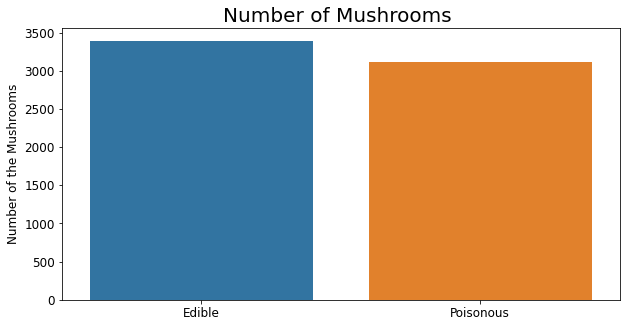

In [12]:
plt.figure(figsize=(10, 5))
plot= sns.countplot(x="class", data=train)

plot.set_xticklabels(['Edible', 'Poisonous'])
plt.ylabel('Number of the Mushrooms', fontsize=12)
plt.xlabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Mushrooms ', fontsize=20)

Text(0.5, 1.0, 'Mushrooms class for each capsize ')

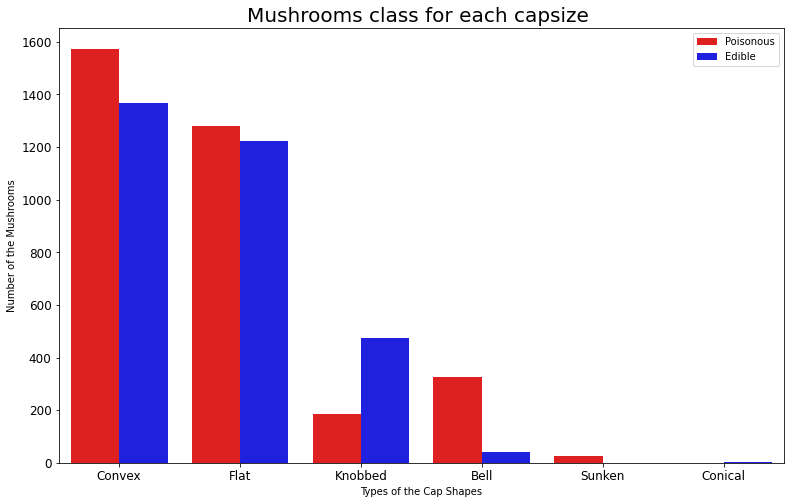

In [13]:
plt.figure(figsize=(13, 8))
plot= sns.countplot(data= train, x='cap-shape', 
                  hue='class',
                  order=train['cap-shape'].value_counts().index, 
                  palette=['red', 'blue'])

plot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=10)
plt.xlabel('Types of the Cap Shapes', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mushrooms class for each capsize ', fontsize=20)

### Data preprocessing

In [14]:
#We have to predict the class output
X=train_enc[train_enc.columns]
X=X.drop(columns=['class','id'])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,0,5,0,1,1,1,1,7,0,...,2,7,7,0,2,1,4,2,4,0
1,2,3,4,0,4,0,0,0,11,0,...,3,1,1,0,2,0,3,7,1,0
2,3,3,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,2
3,5,0,3,0,5,1,1,0,10,0,...,1,7,7,0,2,2,4,7,2,1
4,2,2,3,1,2,1,0,0,7,1,...,2,7,7,0,2,1,4,1,4,1


In [15]:
Y=train_enc['class']
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [16]:
#standardzing
from sklearn.preprocessing import StandardScaler
stand_x=StandardScaler()
X=stand_x.fit_transform(X)
X[0]

array([ 1.02385627, -1.49220129,  0.2012308 , -0.84517655, -1.50608373,
        0.16240066,  2.27289114,  1.51018751,  0.61668803, -1.14793743,
       -0.1080884 ,  0.6844343 ,  0.58704842,  0.62208076,  0.63148697,
        0.        ,  0.14384962, -0.25717134,  0.94670217, -0.66680637,
        0.28937037, -0.87399471])

### Model Building

In [17]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('DecisonTree',DecisionTreeClassifier()))
models.append(('SupportVectorClassification',SVC()))
models

[('LogisticRegression', LogisticRegression()),
 ('DecisonTree', DecisionTreeClassifier()),
 ('SupportVectorClassification', SVC())]

In [18]:
results=[]
names=[]
scoring='accuracy'

In [19]:
#cross validation
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    ans=(f'{name} : {round(cv_result.mean(),3)}({round(cv_result.std(),3)})')
    print(ans)

LogisticRegression : 0.954(0.01)
DecisonTree : 1.0(0.0)
SupportVectorClassification : 1.0(0.0)


### Applying the models

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
#using Decision Tree to make predictions
my_model=DecisionTreeClassifier()
my_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
result=my_model.score(x_test,y_test)
print(f'Accuracy : {result*100} ')

Accuracy : 100.0 


We end up getting a 100% accuracy on are training set

In [23]:
my_model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)